# GET THE DATASET

In [60]:
!wget https://archive.org/download/kc_house_data/kc_house_data.csv

--2024-03-26 17:11:46--  https://archive.org/download/kc_house_data/kc_house_data.csv
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia801005.us.archive.org/28/items/kc_house_data/kc_house_data.csv [following]
--2024-03-26 17:11:47--  https://ia801005.us.archive.org/28/items/kc_house_data/kc_house_data.csv
Resolving ia801005.us.archive.org (ia801005.us.archive.org)... 207.241.228.85
Connecting to ia801005.us.archive.org (ia801005.us.archive.org)|207.241.228.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2226636 (2.1M) [text/csv]
Saving to: ‘kc_house_data.csv.2’

kc_house_data.csv.2 100%[===================>]   2.12M  1.76MB/s    in 1.2s    

2024-03-26 17:11:49 (1.76 MB/s) - ‘kc_house_data.csv.2’ saved [2226636/2226636]



# IMPORT LIBRARIES

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [62]:
df = pd.read_csv("/content/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## YÊU CẦU PHẢI LỰA CHỌN RA HAI INDEPENDENT VARIABLE PHÙ HỢP ĐỂ CÓ THỂ DỰ ĐOÁN ĐƯỢC GIÁ CỦA NGÔI NHÀ
## GỢI Ý: VISUALIZATION TỪNG FEATURE VỚI PRICE

In [ ]:
...

## TẠO DATAFRAME MỚI TÊN data VỚI HAI FEATURE ĐƯỢC CHỌN VÀ GIÁ NHÀ

In [ ]:
...

# THỰC HIỆN VISUALIZATION TỪNG INDEPENDENT VARIABLE ĐƯỢC CHỌN VỚI PRICE

In [ ]:
...

In [ ]:
...

## THỰC HIỆN TÍNH TOÁN W và B

In [67]:
idx = np.random.rand(len(df)) < 0.8
train = data[idx]
test = data[~idx]

print('Train size:', len(train))
print('Train test:', len(test))

Train size: 17315
Train test: 4282


In [68]:
...
w = ...
b = ...

In [73]:
def predict(x):
  ...

In [74]:
def compute_cost(y, y_):
  ...

## THỰC HIỆN VỚI SKLEARN

In [75]:
regr = LinearRegression()

regr.fit(train_x, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [159.57428817 174.88874102]
Intercept:  -88945.33528676338


In [76]:
from sklearn.metrics import r2_score

test_y_pre = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_pre - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_pre - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_pre))

test_y_ = predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))
print("Cost: %.2f" % compute_cost(test_y , test_y_) )

Mean absolute error: 184906.69
Residual sum of squares (MSE): 75082891630.59
R2-score: 0.41
Mean absolute error: 184906.69
Residual sum of squares (MSE): 75082891630.59
R2-score: 0.41
Cost: 37541445815.30


In [82]:
xy_plt = np.concatenate([np.linspace(1000, 6000, 100)[:, None], np.linspace(2000, 8000, 100)[:, None]], axis=1)

X, Y = np.meshgrid(xy_plt[:, 0], xy_plt[:, 1])
zs = np.array([regr.predict([[x, y]]) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

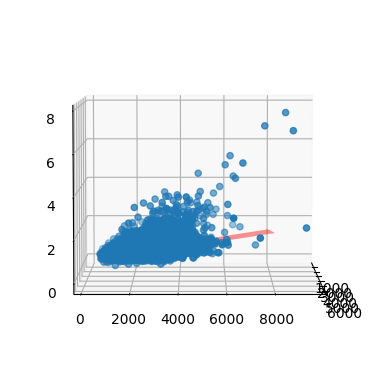

In [87]:
ax = plt.axes(projection='3d')
ax.view_init(5, 0) # change view to see more

ax.scatter3D(train_x[:, 0], train_x[:, 1], train_y, 'blue')

ax.plot_surface(X, Y, Z, color='r', alpha=0.5)

In [92]:
import plotly.graph_objects as go

fig = go.Figure(data = [go.Surface(z = Z, x = xy_plt[:, 0], y = xy_plt[:, 1], opacity = 0.9, showscale=False)])

fig.add_scatter3d(
    x = train_x[:, 0], y = train_x[:, 1], z = train_y.ravel(), name='train', mode = 'markers', marker = dict(
        size = 5,
        opacity = 0.5
        ),
    )

fig.add_scatter3d(
    x = test_x[:, 0], y = test_x[:, 1], z = test_y.ravel(), name='test', mode = 'markers', marker = dict(
        size = 5,
        opacity = 0.5
        )
    )

fig.update_layout(
    title="TARGET FEATURE",
    scene = dict(
        xaxis = dict(title='FEATURE 1'),
        yaxis = dict(title='FEATURE 2'),
        zaxis = dict(title='TARGET FEATURE')
        )
    )

fig.show()